In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import glob, operator, time, shutil, scipy, sys
from matplotlib import pyplot as plt
import matplotlib.cm as cm
pd.set_option('display.max_columns', 100)
plt.style.use('classic')

In [20]:
def new_fig(figsize=(8, 8)):
    plt.close()
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)    
    ax.yaxis.grid(linestyle='--')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_markersize(8)
    return ax

In [4]:
df = pd.read_csv('../data/composed/mira_top_10.csv', low_memory=False)

In [71]:
# df.dropna(inplace=True)
# for cols in df.columns:
#     print(cols)

In [72]:
# df.sample(frac=1);

In [5]:
df.zero_execName.unique()

array(['aims.071914_7.scalapack.mpi.x', 'mcfm_omp', 'qlua-bkend',
       'nek5000', 'nwchem-6.6-dft-hf-mp2-only.off', 'waveqlab3d',
       'fdl3di.exe', 'miniFE.V1R2M4-xl.x', 'ks_spectrum_hisq',
       'stitch.exe', 'cesm.exe'], dtype=object)

In [6]:
df.USED_CORE_HOURS.sum()

32265812896.530598

In [8]:
df['Wall_Time'] = df.WALLTIME_SECONDS / 3600
df['Run_Time'] = df.RUNTIME_SECONDS / 3600

In [76]:
# %matplotlib inline
# # plt.scatter(result.name, result.t_std / result.t_mean)
# for i in range(9):
# #     print(df[df.zero_execName == df.zero_execName.unique()[i]].zero_elapsedTime.describe())
#     fig = plt.figure()
#     plt.hist(df[df.zero_execName == df.zero_execName.unique()[i]].zero_elapsedTime, bins=20);
#     plt.title(df.zero_execName.unique()[i])
# # plt.hist(df[df.zero_execName == 'pibis'][df.zero_elapsedTime >= 1000].zero_elapsedTime, bins=20);

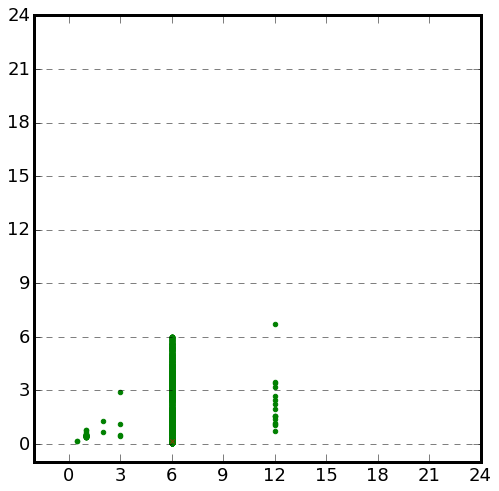

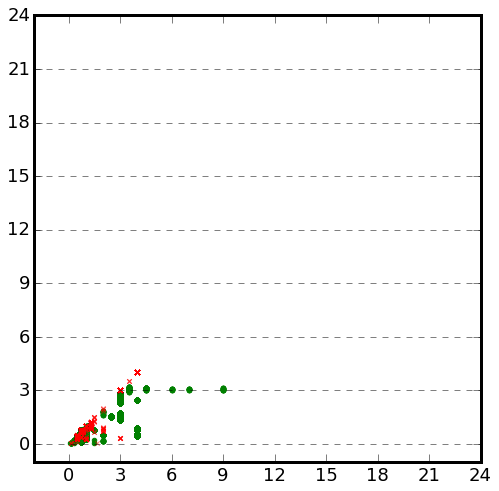

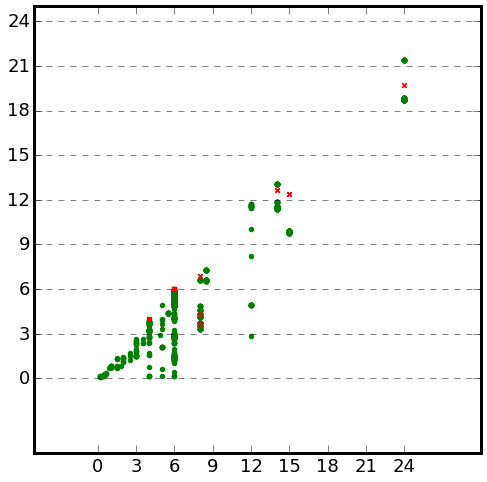

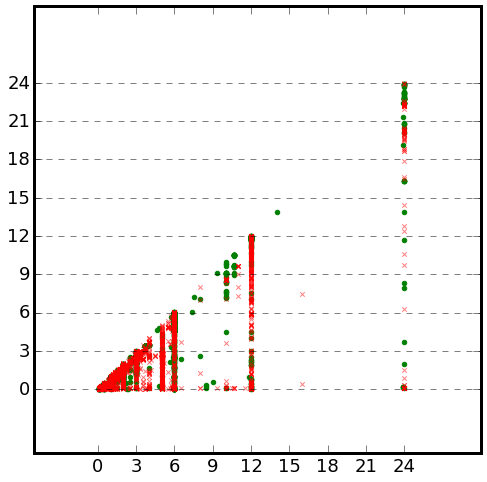

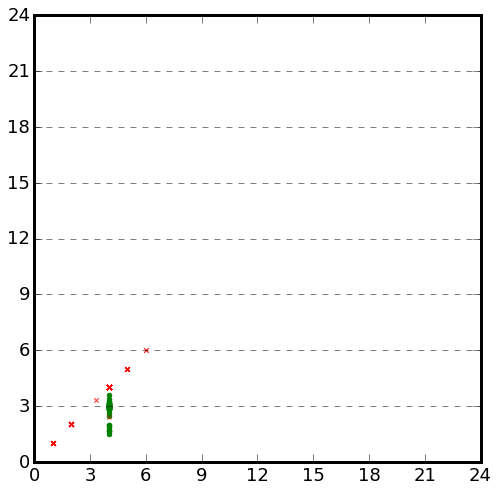

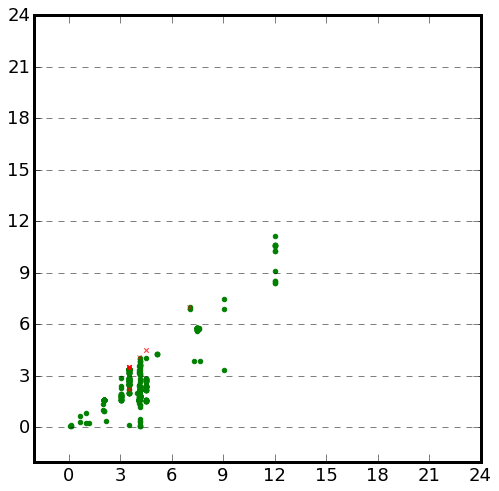

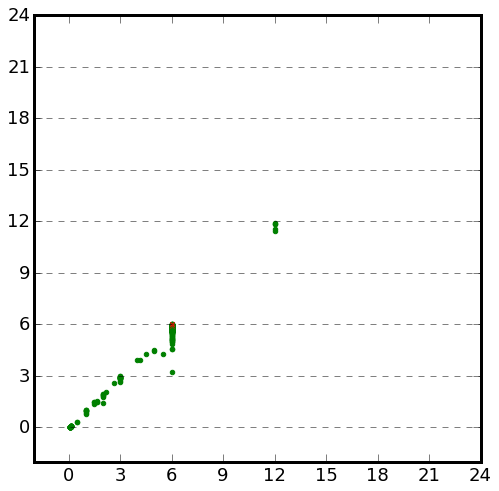

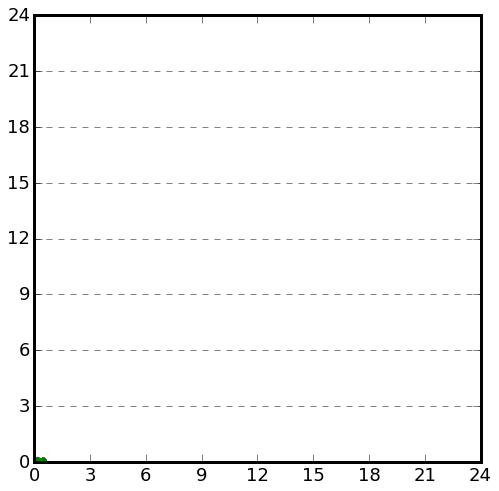

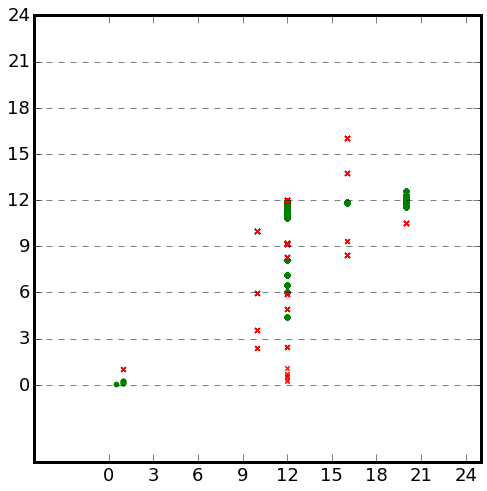

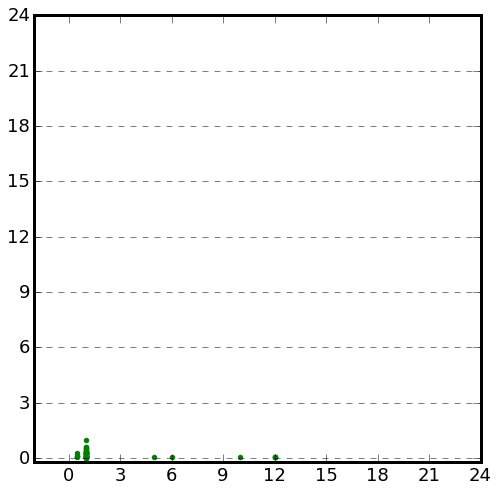

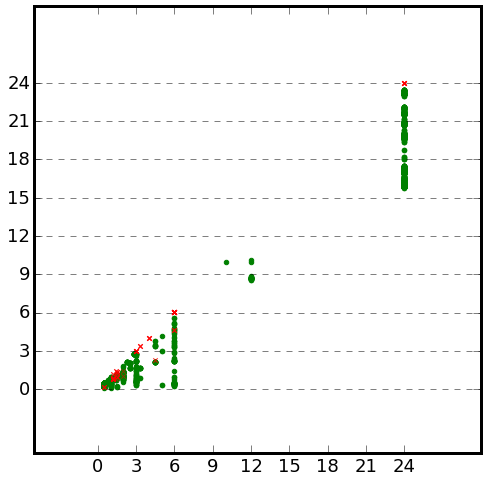

In [26]:
%matplotlib inline

for i in range(len(df.zero_execName.unique())):
    plotdf = df[df.zero_execName == df.zero_execName.unique()[i]]
    exit_cleandf = plotdf[plotdf['EXIT_STATUS'] == 0].append(plotdf[plotdf['EXIT_STATUS'] > 255])
    exit_faildf = pd.concat([plotdf, exit_cleandf, exit_cleandf]).drop_duplicates(keep=False)
    ax = new_fig()
    plt.scatter(exit_cleandf['Wall_Time'], 
                exit_cleandf['Run_Time'], 
                color = 'green',
                marker = 'o',
               )
    plt.scatter(exit_faildf['Wall_Time'], 
                exit_faildf['Run_Time'],
                color = 'red',
                marker = 'x',
                alpha = 0.5
               )
    plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
    plt.yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
    plt.show()
# for i in range(len(df.zero_execName.unique())):
#     plotdf = df[df.zero_execName == df.zero_execName.unique()[i]]
#     exit_cleandf = plotdf[plotdf['EXIT_STATUS'] == 0].append(plotdf[plotdf['EXIT_STATUS'] > 255])
#     exit_faildf = pd.concat([plotdf, exit_cleandf, exit_cleandf]).drop_duplicates(keep=False)
#     ax = exit_cleandf.plot(x='Wall_Time', y='Run_Time', kind='scatter', title=df.zero_execName.unique()[i],
#                xticks=range(25),
#                yticks=range(25),
#                figsize=(15,15),
#                alpha=.5,
#                color='Green',
#                grid=True)
#     exit_faildf.plot(x='Wall_Time', y='Run_Time', kind='scatter', title=df.zero_execName.unique()[i],
#                alpha=.1,
#                ax = ax,
#                color='Green',
#                     grid=True)
#     plt.scatter(plotdf.WALLTIME_SECONDS, plotdf.RUNTIME_SECONDS);
#     plt.title(df.zero_execName.unique()[i])
# plt.savefig('figure/charles_exe.png')

/home/luckierdodge/anaconda3/envs/autoperf_tf/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/envs/autoperf_tf/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/envs/autoperf_tf/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/envs/autoperf_tf/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/envs/autoperf_tf/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/envs/autoperf_tf/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/envs/autoperf_tf/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyf

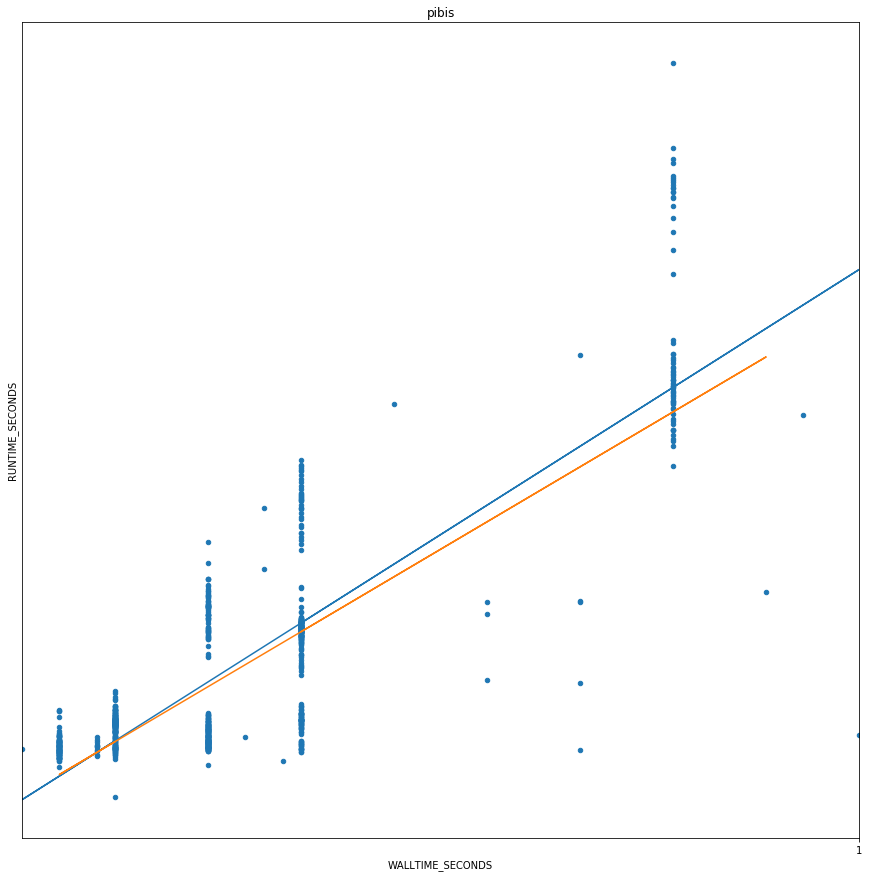

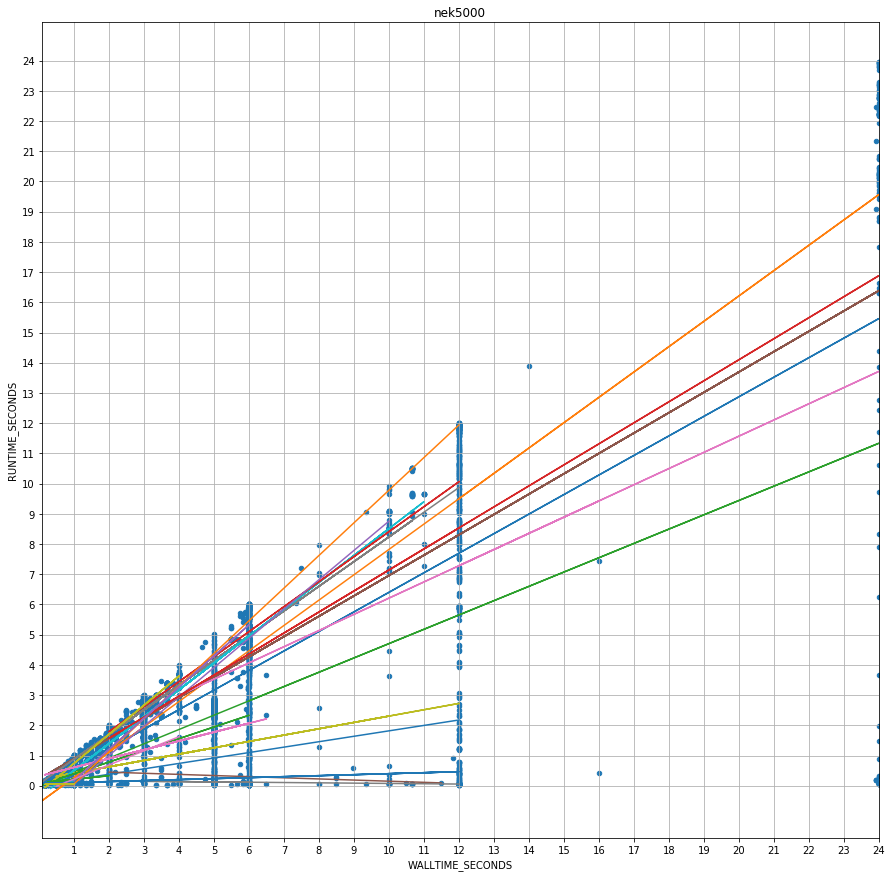

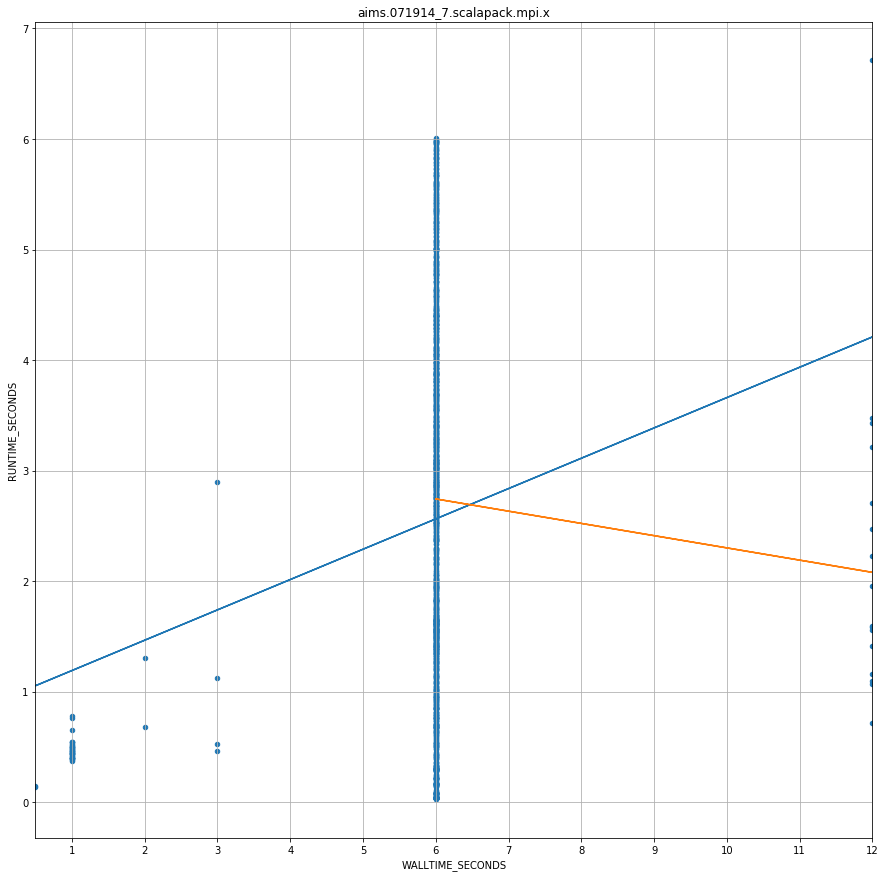

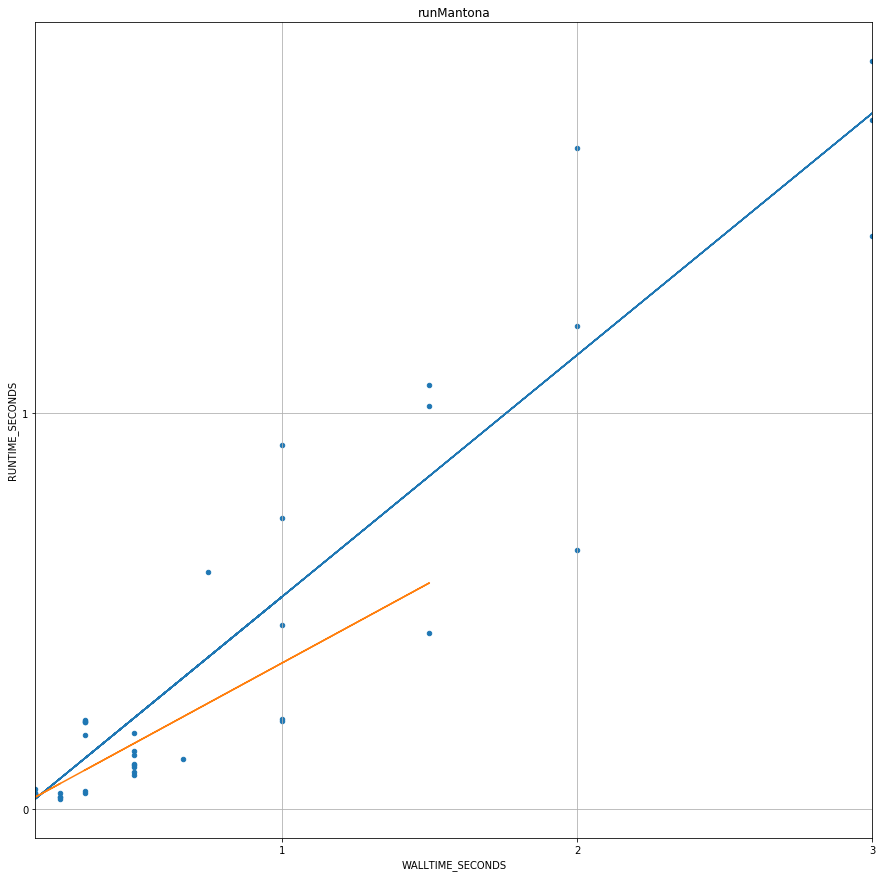

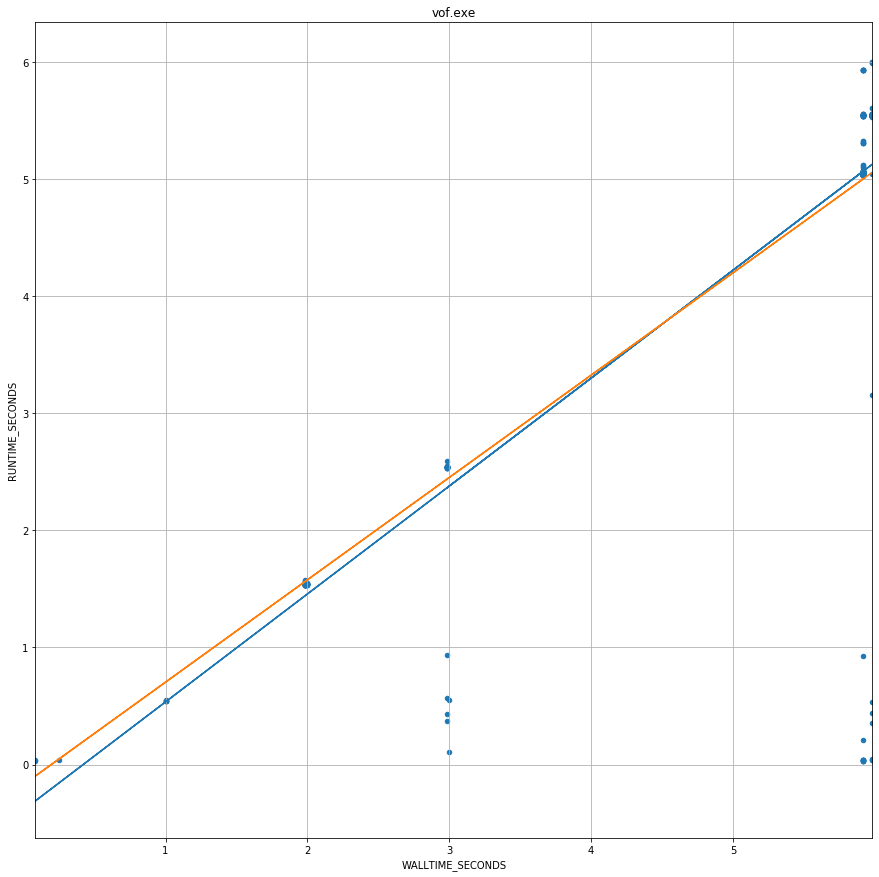

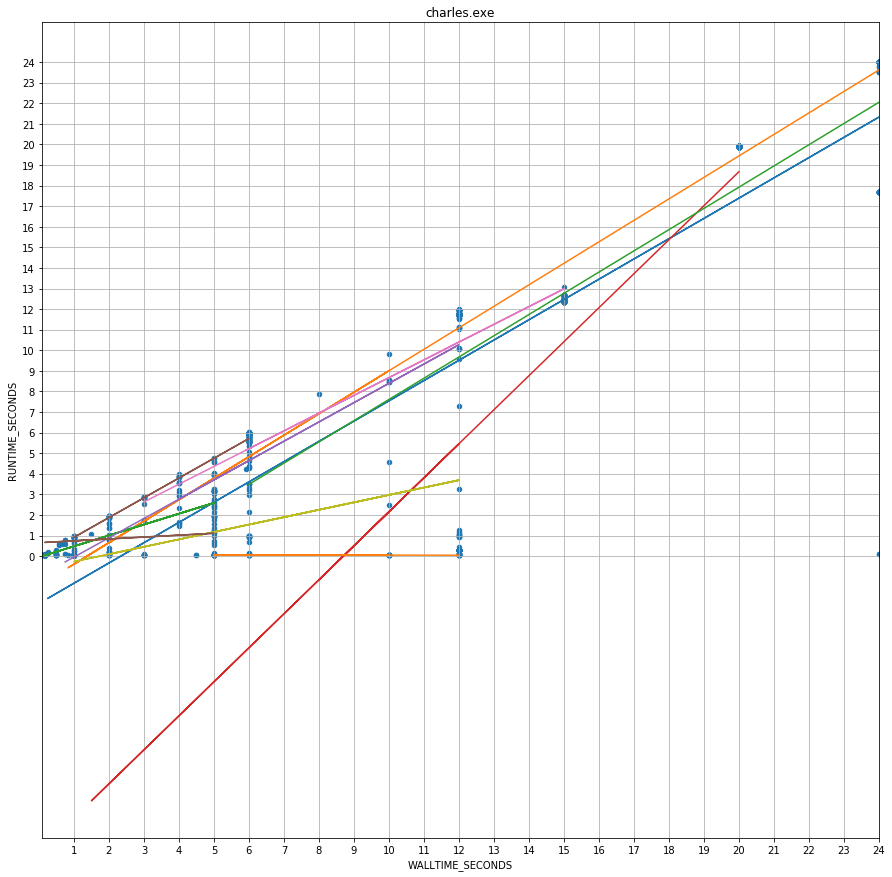

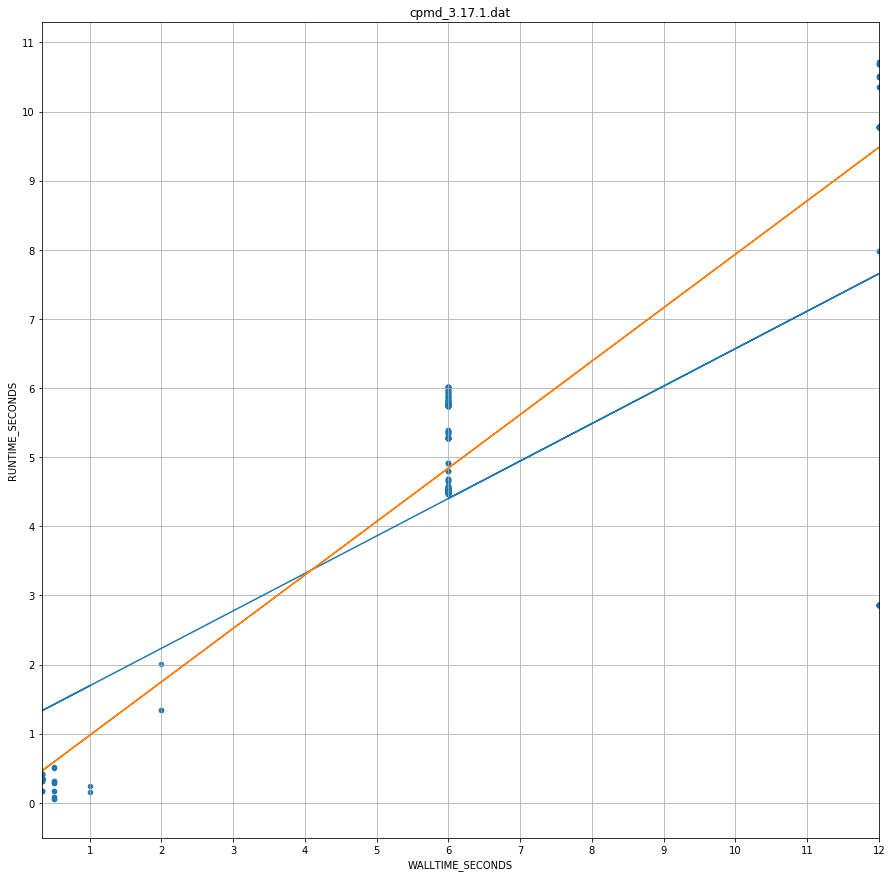

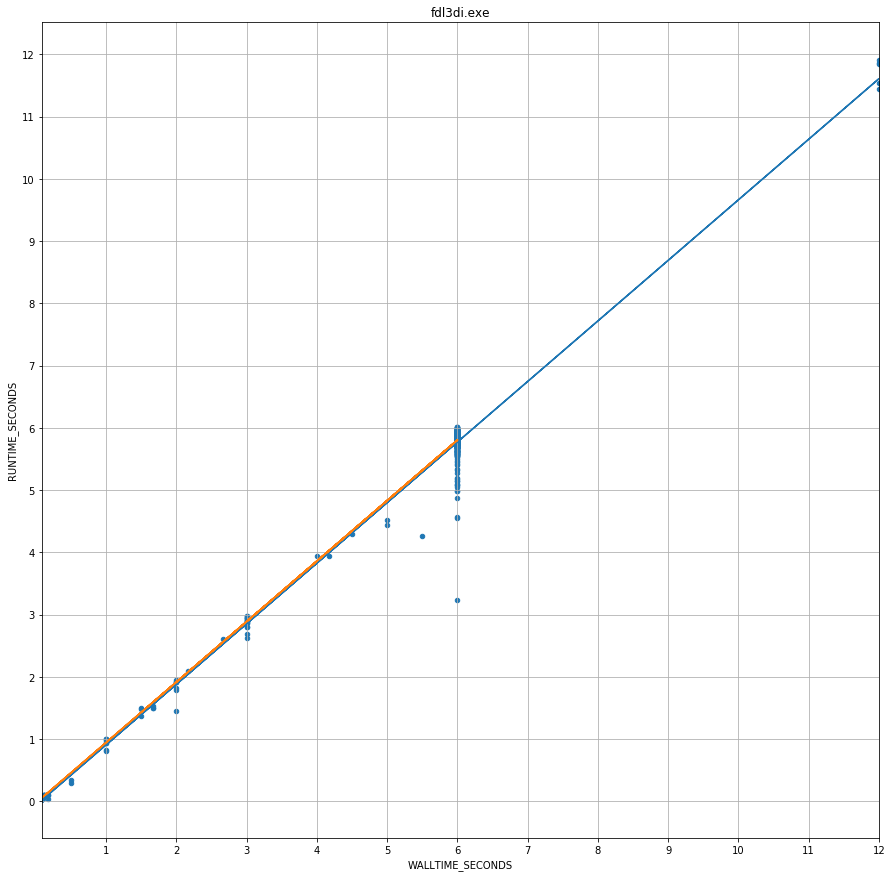

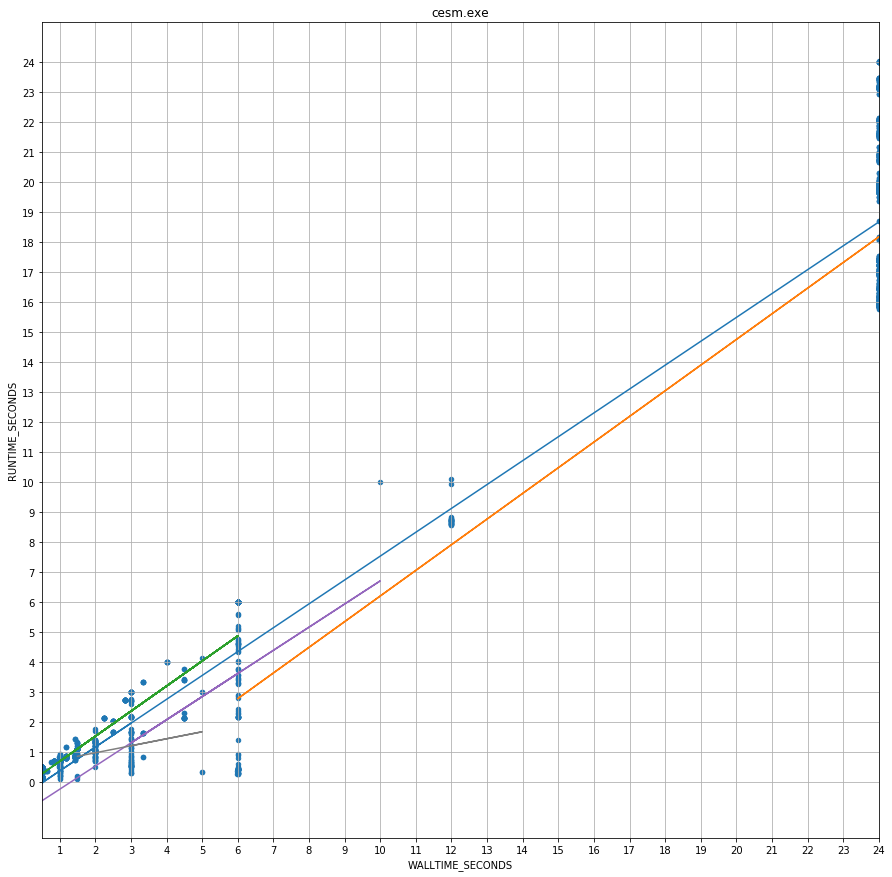

In [78]:
%matplotlib inline
colors = cm.rainbow(np.linspace(0, 1, len(df.zero_userName.unique())))
for i in range(9):
    plotdf = df[df.zero_execName == df.zero_execName.unique()[i]]
    userids = plotdf.zero_userName.unique()
    j = -1
    for uname in userids:
        j += 1
        if j == 0:
            userdf = plotdf[plotdf.zero_userName == userids[j]].copy()
            ax = userdf.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='scatter', title=df.zero_execName.unique()[i],
                       xticks=range(25),
                       yticks=range(25),
                       figsize=(15,15),
#                        alpha=.5,
#                        color=colors[j],
                       grid=True,
                       legend=False)
            lm_original = np.polyfit(userdf.WALLTIME_SECONDS, userdf.RUNTIME_SECONDS, 1)
            r_x, r_y = zip(*((k, k*lm_original[0] + lm_original[1]) for k in userdf.WALLTIME_SECONDS))
            lm_original_plot = pd.DataFrame({'WALLTIME_SECONDS': r_x, 'RUNTIME_SECONDS': r_y})
            lm_original_plot.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='line', title=df.zero_execName.unique()[i],
                       ax=ax,
#                        color=colors[j],
                       grid=True,
                       legend=False)
        else:
            userdf = plotdf[plotdf.zero_userName == uname].copy()
            lm_original = np.polyfit(userdf.WALLTIME_SECONDS, userdf.RUNTIME_SECONDS, 1)
            r_x, r_y = zip(*((k, k*lm_original[0] + lm_original[1]) for k in userdf.WALLTIME_SECONDS))
            lm_original_plot = pd.DataFrame({'WALLTIME_SECONDS': r_x, 'RUNTIME_SECONDS': r_y})
            userdf.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='scatter', title=df.zero_execName.unique()[i],
#                        alpha=.5,
                       ax = ax,
#                        color=colors[j],
                       grid=True,
                       legend=False)
            lm_original_plot.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='line', title=df.zero_execName.unique()[i],
                       ax=ax,
#                        color=colors[j],
                       grid=True,
                       legend=False)

Runtime Accuracy Prediction, by Process, by User:

 pibis :
= : 0.7631567114432017
jxliu : 0.750226747687379

 nek5000 :
= : 0.6177089709559882
jklai : 0.7043661199147982
obabko : 0.37083473153811136
crusher : 0.32728682170542633
ewolters : 0.24333333333333332
mayildiz : 0.6625362654320986
scheel : 0.586516975308642
gbot : 0.8058912948933781
hyuan : 0.29721044973544974
vidal : 0.714032622789044
goran : 0.1973726851851852
thilina : 0.06305555555555556
yiqi : 0.3640509259259259
bissett : 0.8526157407407409
merzari : 0.019305555555555555
sspatel : 0.11658212560386473
keding : 0.41
yyangufl : 0.08790637860082307
kmittal : 0.7326199494949496
dshaver : 0.865011574074074
omarin : 0.24569444444444447
harms : 0.29060185185185183
mschanen : 0.29580555555555554
tnordd : 0.16740740740740737
maijiaqi : 0.594037037037037
nicolaso : 0.35777777777777775
javier : 0.5346312915479583
bramesh : 0.03332561728395062
chunduri : 0.05861581920903955
venterrm : 0.13027777777777777
svegendl : 0.2849410722450846


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effc01a3550>]],
      dtype=object)

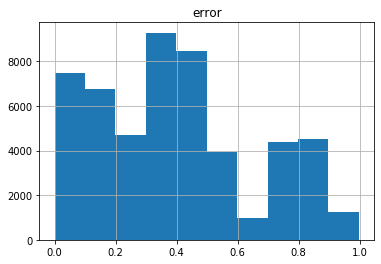

In [79]:
print("Runtime Accuracy Prediction, by Process, by User:")
for i in range(9):
    execdf = df[df.zero_execName == df.zero_execName.unique()[i]]
    print("\n", df.zero_execName.unique()[i], ":")
    userids = execdf.zero_userName.unique()
    for uid in userids:
        userdf = execdf[execdf.zero_userName == uid].copy()
        userdf['error'] = userdf["RUNTIME_SECONDS"] / userdf["WALLTIME_SECONDS"]
        print(uid, ":", userdf.error.mean())

%matplotlib inline
errdf = df.copy()
errdf['error'] = abs(1 - errdf["RUNTIME_SECONDS"] / errdf["WALLTIME_SECONDS"])
errdf.hist(column='error')

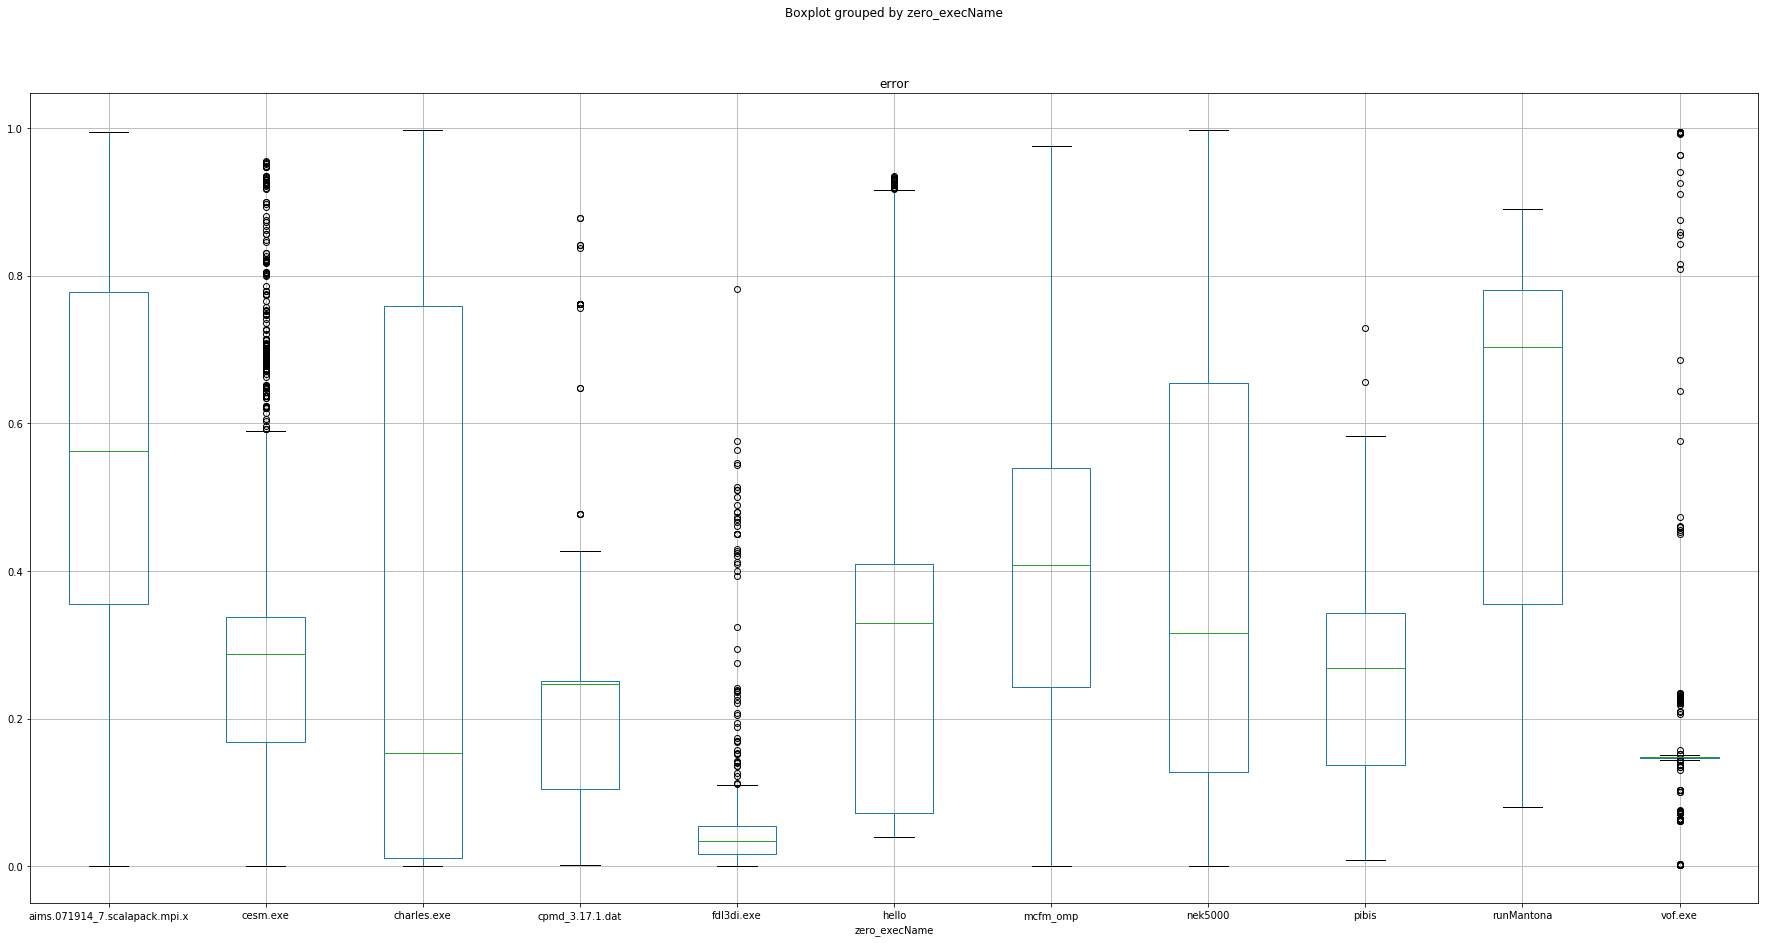

In [80]:
errdf.boxplot(column='error', by='zero_execName', figsize=(30, 15))

In [64]:
# rows = []
# # result = pd.DataFrame(columns=['name', 'ranks', 'procs', 't_mean', 't_std'])
# for name in df.zero_execName.unique():
#     df_name = df[df['zero_execName'] == name]
#     for num_ranks in df_name.zero_numRanks.unique():
#         df_name_rank = df_name[df_name['zero_numRanks'] == num_ranks]
#         for num_proc in df_name_rank.av_numProcessesOnNode.unique():
#             avElapsedTime = df_name_rank[df_name_rank['av_numProcessesOnNode'] == num_proc].zero_elapsedTime.mean()
#             stdElapsedTime = df_name_rank[df_name_rank['av_numProcessesOnNode'] == num_proc].zero_elapsedTime.std()
#             count = df_name_rank[df_name_rank['av_numProcessesOnNode'] == num_proc].shape[0]
#             rows.append({
#                 'name': name,
#                 'ranks': num_ranks,
#                 'procs': num_proc,
#                 't_mean': avElapsedTime,
#                 't_std': stdElapsedTime,
#                 'num': count
#             })
# #             result.append([name, num_ranks, num_proc, avElapsedTime], inplace=True)
# result = pd.DataFrame(rows)
# result.describe()

In [ ]:
# %matplotlib inline
# plt.figure(figsize=(20,15))
# # plt.scatter(result.name, result.t_std / result.t_mean)
# plt.scatter(result.name, result.t_std)